<a href="https://colab.research.google.com/github/haima2209/LGMdatascienceTask/blob/main/EDA_TERRORISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA-ANALYSIS ON DATASET-TERRORISM**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
terror_data=pd.read_csv('/content/globalterrorism.csv',encoding='unicode_escape')



In [4]:
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [46]:
terror_data.shape
pd.set_option('display.max_rows', None)

In [48]:
pd.isnull(terror_data).sum()

iyear                 0
imonth                0
country_txt           0
region_txt            0
provstate            10
city                  0
latitude             48
longitude            48
location           2456
summary            2196
attacktype1_txt       0
targtype1_txt         0
gname                 0
motive             2457
weaptype1_txt         0
nkill                 0
nwound                0
addnotes           2400
Casualty              0
dtype: int64

In [49]:
for i in terror_data.columns:
  print(i ,end=',')

iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes,Casualty,

**DATA CLEANING**

In [50]:
terror_data=terror_data[['iyear','imonth','country_txt','region_txt','provstate','city','latitude','longitude','location','summary','attacktype1_txt','targtype1_txt','gname','motive','weaptype1_txt','nkill','nwound','addnotes']]

In [51]:
terror_data.head()

,iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN


In [52]:
terror_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            2917 non-null   int64  
 1   imonth           2917 non-null   int64  
 2   country_txt      2917 non-null   object 
 3   region_txt       2917 non-null   object 
 4   provstate        2907 non-null   object 
 5   city             2917 non-null   object 
 6   latitude         2869 non-null   float64
 7   longitude        2869 non-null   float64
 8   location         461 non-null    object 
 9   summary          721 non-null    object 
 10  attacktype1_txt  2917 non-null   object 
 11  targtype1_txt    2917 non-null   object 
 12  gname            2917 non-null   object 
 13  motive           460 non-null    object 
 14  weaptype1_txt    2917 non-null   object 
 15  nkill            2917 non-null   float64
 16  nwound           2917 non-null   float64
 17  addnotes      

In [53]:
terror_data['nkill']=terror_data['nkill'].fillna(0)
terror_data['nwound']=terror_data['nwound'].fillna(0)
terror_data['Casualty']=terror_data['nkill']+terror_data['nwound']
terror_data.head()


<ipython-input-53-670b01f2a056>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_data['nkill']=terror_data['nkill'].fillna(0)
<ipython-input-53-670b01f2a056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_data['nwound']=terror_data['nwound'].fillna(0)


,iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes,Casualty
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0


In [54]:
terror_data.describe()

,iyear,imonth,latitude,longitude,nkill,nwound,Casualty
count,2917.000000,2917.000000,2869.000000,2869.000000,2917.000000,2917.000000,2917.000000
mean,1972.130614,6.129928,35.685756,-35.463317,0.661639,0.777168,1.438807
std,1.590787,3.420554,24.626973,53.617139,3.050053,7.213840,8.374186
min,1970.000000,0.000000,-43.532054,-157.818968,0.000000,0.000000,0.000000
25%,1971.000000,3.000000,34.097866,-75.142561,0.000000,0.000000,0.000000
50%,1972.000000,6.000000,40.697132,-7.312045,0.000000,0.000000,0.000000
75%,1974.000000,9.000000,54.183052,-1.977903,1.000000,0.000000,1.000000
max,1975.000000,12.000000,59.332788,172.636225,88.000000,238.000000,239.000000


In [75]:
terror_data.head()

,iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes,Casualty
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0


**VISUALISING DATA**

**1.YEAR-WISE ATTACKS**

In [149]:
attacks=terror_data['iyear'].value_counts()
attacks

1970    651
1974    581
1972    568
1973    473
1971    471
1975    173
Name: iyear, dtype: int64

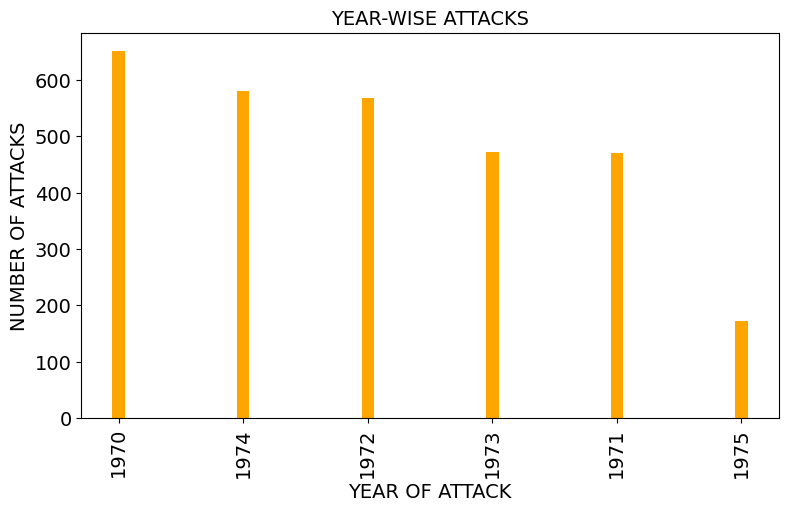

In [146]:
attacks.plot(kind='bar',color='orange',figsize=(9,5),fontsize=14,width=0.1)
plt.xlabel('YEAR OF ATTACK',fontsize=14)
plt.ylabel('NUMBER OF ATTACKS',fontsize=14)
plt.title('YEAR-WISE ATTACKS',fontsize=14)
plt.show()

**2.YEAR-WISE CASUALITIES**

<Axes: xlabel='iyear', ylabel='Casualty'>

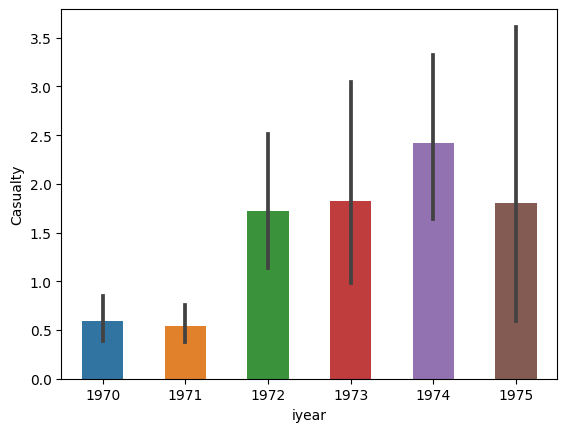

In [80]:
sns.barplot(data=terror_data,x='iyear',y='Casualty',width=0.5)

**3.DISPLAY OF ATTACKS ON THE BASIS OF REGION**

In [84]:
region=pd.crosstab(terror_data.iyear,terror_data.region_txt)
region.head()

region_txt,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


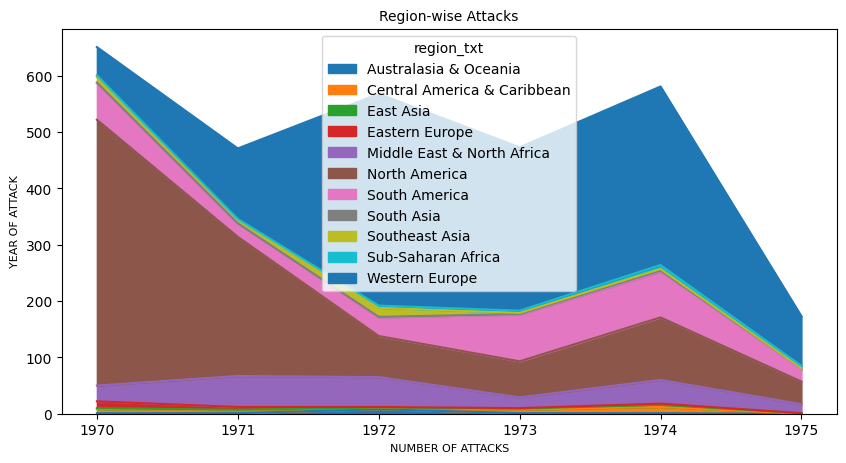

In [107]:
region.plot(kind='area',stacked='False',figsize=(10,5))
plt.title("Region-wise Attacks",fontsize=10)
plt.xlabel("NUMBER OF ATTACKS",fontsize=8)
plt.ylabel("YEAR OF ATTACK",fontsize=8)
plt.show()

**4.COUNTRY-WISE ATTACKS**

In [103]:
cnt=terror_data['country_txt'].value_counts().head(15)
cnt

United States         974
United Kingdom        811
Argentina             195
West Germany (FRG)    118
Spain                 110
France                 65
Turkey                 58
Iran                   51
Italy                  49
Uruguay                48
Lebanon                33
Israel                 30
Mexico                 26
Greece                 23
Jordan                 22
Name: country_txt, dtype: int64

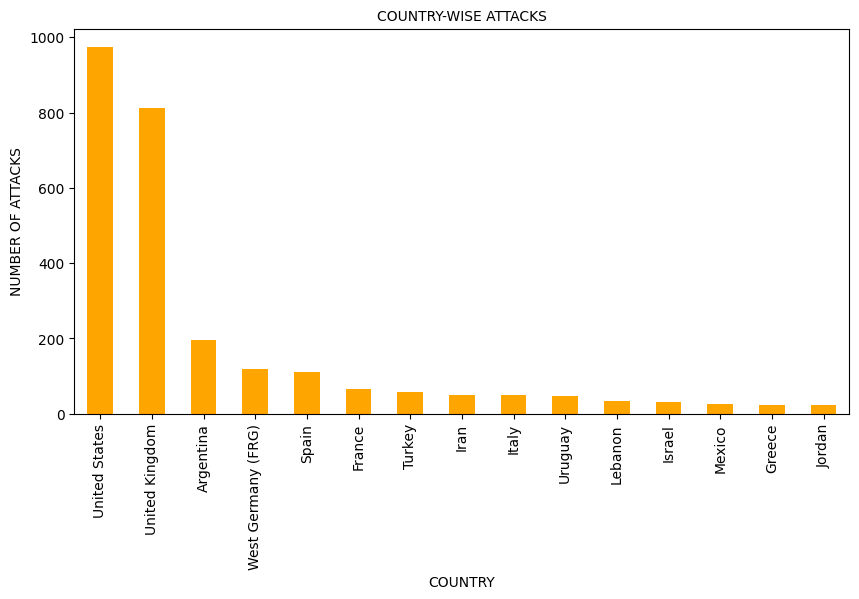

In [109]:
cnt.plot(kind="bar",color='orange',figsize=(10,5),width=0.5)
plt.xlabel("COUNTRY",fontsize=10)
plt.ylabel("NUMBER OF ATTACKS",fontsize=10)
plt.title("COUNTRY-WISE ATTACKS",fontsize=10)
plt.show()

**5.GROUP-WISE ATTACKS**

In [121]:
grp_attack=terror_data['gname'].value_counts().head(20)
grp_attack

Unknown                                                 551
Irish Republican Army (IRA)                             463
Left-Wing Militants                                     169
Protestant extremists                                   119
Black September                                         119
Ulster Volunteer Force (UVF)                             91
Black Nationalists                                       82
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)     76
Student Radicals                                         71
Ulster Freedom Fighters (UFF)                            59
Weather Underground, Weathermen                          43
Tupamaros (Uruguay)                                      41
White extremists                                         40
Popular Front for the Liberation of Palestine (PFLP)     35
Black Liberation Army                                    34
Montoneros (Argentina)                                   34
Jewish Defense League (JDL)             

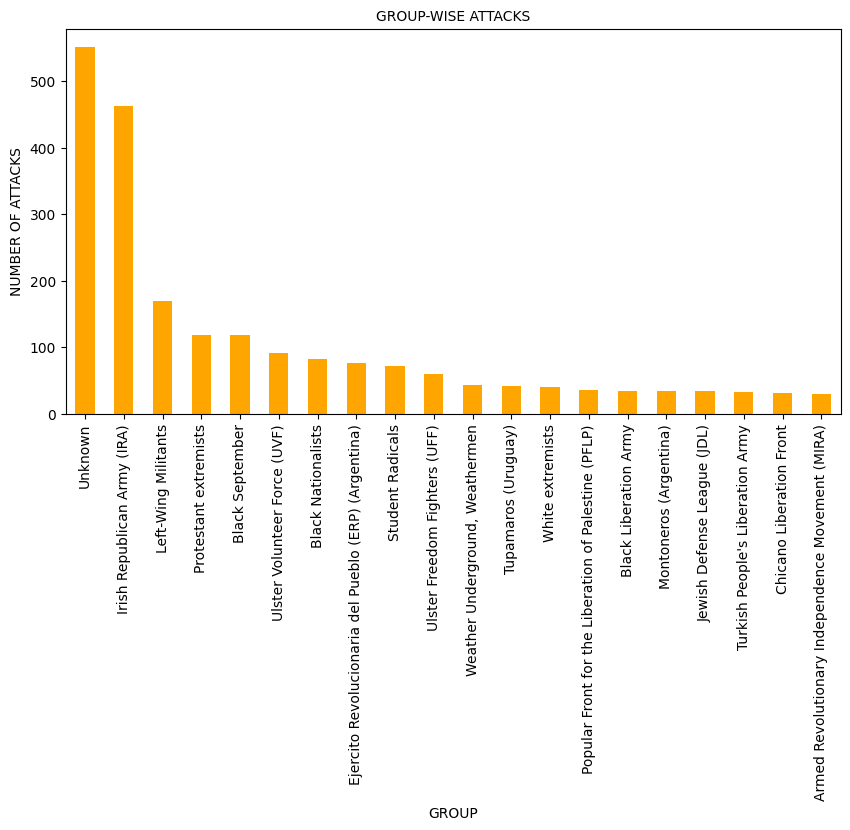

In [124]:
grp_attack.plot(kind="bar",color='orange',figsize=(10,5),width=0.5)
plt.xlabel("GROUP",fontsize=10)
plt.ylabel("NUMBER OF ATTACKS",fontsize=10)
plt.title("GROUP-WISE ATTACKS",fontsize=10)
plt.show()

**6.TARGET TYPE WISE ATTACK**

In [126]:
target=terror_data['targtype1_txt'].value_counts().head(15)
target

Business                          663
Private Citizens & Property       519
Military                          490
Government (Diplomatic)           293
Police                            228
Government (General)              224
Educational Institution           119
Airports & Aircraft               104
Utilities                          55
Terrorists/Non-State Militia       55
Journalists & Media                44
Religious Figures/Institutions     31
Transportation                     21
NGO                                21
Telecommunication                  14
Name: targtype1_txt, dtype: int64

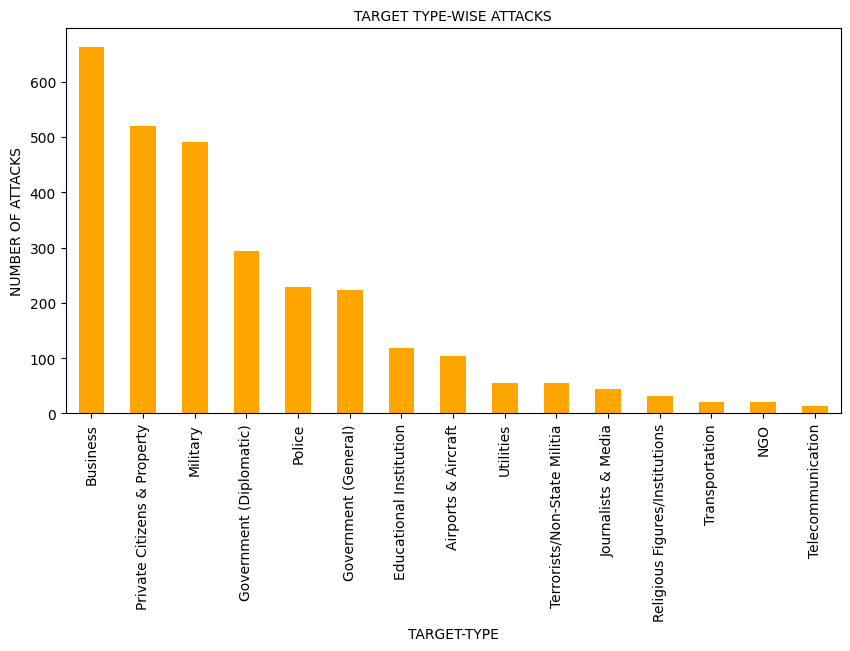

In [131]:
target.plot(kind="bar",color='orange',figsize=(10,5),width=0.5)
plt.xlabel("TARGET-TYPE",fontsize=10)
plt.ylabel("NUMBER OF ATTACKS",fontsize=10)
plt.title("TARGET TYPE-WISE ATTACKS",fontsize=10)
plt.show()

In [134]:
x=terror_data[['attacktype1_txt','targtype1_txt']].value_counts().head(15)
x

attacktype1_txt                 targtype1_txt              
Bombing/Explosion               Business                       412
Assassination                   Private Citizens & Property    298
                                Military                       181
Bombing/Explosion               Military                       168
                                Government (Diplomatic)        137
                                Private Citizens & Property    125
Facility/Infrastructure Attack  Business                       114
Bombing/Explosion               Government (General)            98
                                Police                          85
Assassination                   Government (Diplomatic)         71
Armed Assault                   Military                        64
Bombing/Explosion               Educational Institution         62
Armed Assault                   Police                          61
                                Business                        60
As

**TOP 10 BASED ON GROUPS AND ATTACKED-COUNTRIES**

In [152]:
top=terror_data[["gname","country_txt"]].value_counts().drop("Unknown")
top.head(10)

<ipython-input-152-3bde48258ab0>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  top=terror_data[["gname","country_txt"]].value_counts().drop("Unknown")


gname                                                 country_txt   
Irish Republican Army (IRA)                           United Kingdom    455
Left-Wing Militants                                   United States     169
Protestant extremists                                 United Kingdom    118
Ulster Volunteer Force (UVF)                          United Kingdom     87
Black Nationalists                                    United States      82
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)  Argentina          76
Student Radicals                                      United States      71
Ulster Freedom Fighters (UFF)                         United Kingdom     58
Weather Underground, Weathermen                       United States      43
Tupamaros (Uruguay)                                   Uruguay            41
dtype: int64

**THANK YOU.........**